In [1]:
import warnings
import os

os.environ["OMP_NUM_THREADS"] = "1"
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine

In [3]:
#Load dataset
data=load_wine()
X=data.data
y=data.target

In [4]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
data["feature_names"]

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
print("Original Data. Shape:", X.shape)

Original Data. Shape: (178, 13)


In [7]:
df=pd.DataFrame(data["data"],columns=data["feature_names"])
df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

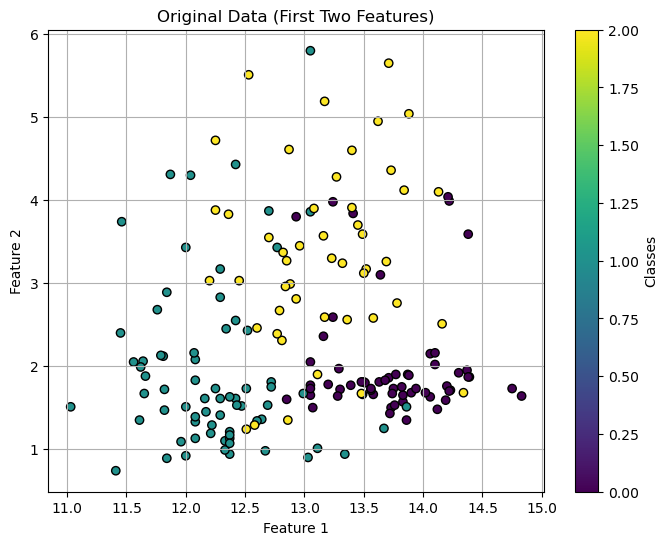

In [8]:
#Visualize original data using first two features
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0],X[:,1],c=y, cmap='viridis',edgecolor='k')
plt.title("Original Data (First Two Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Classes")
plt.grid(True)
plt.show()

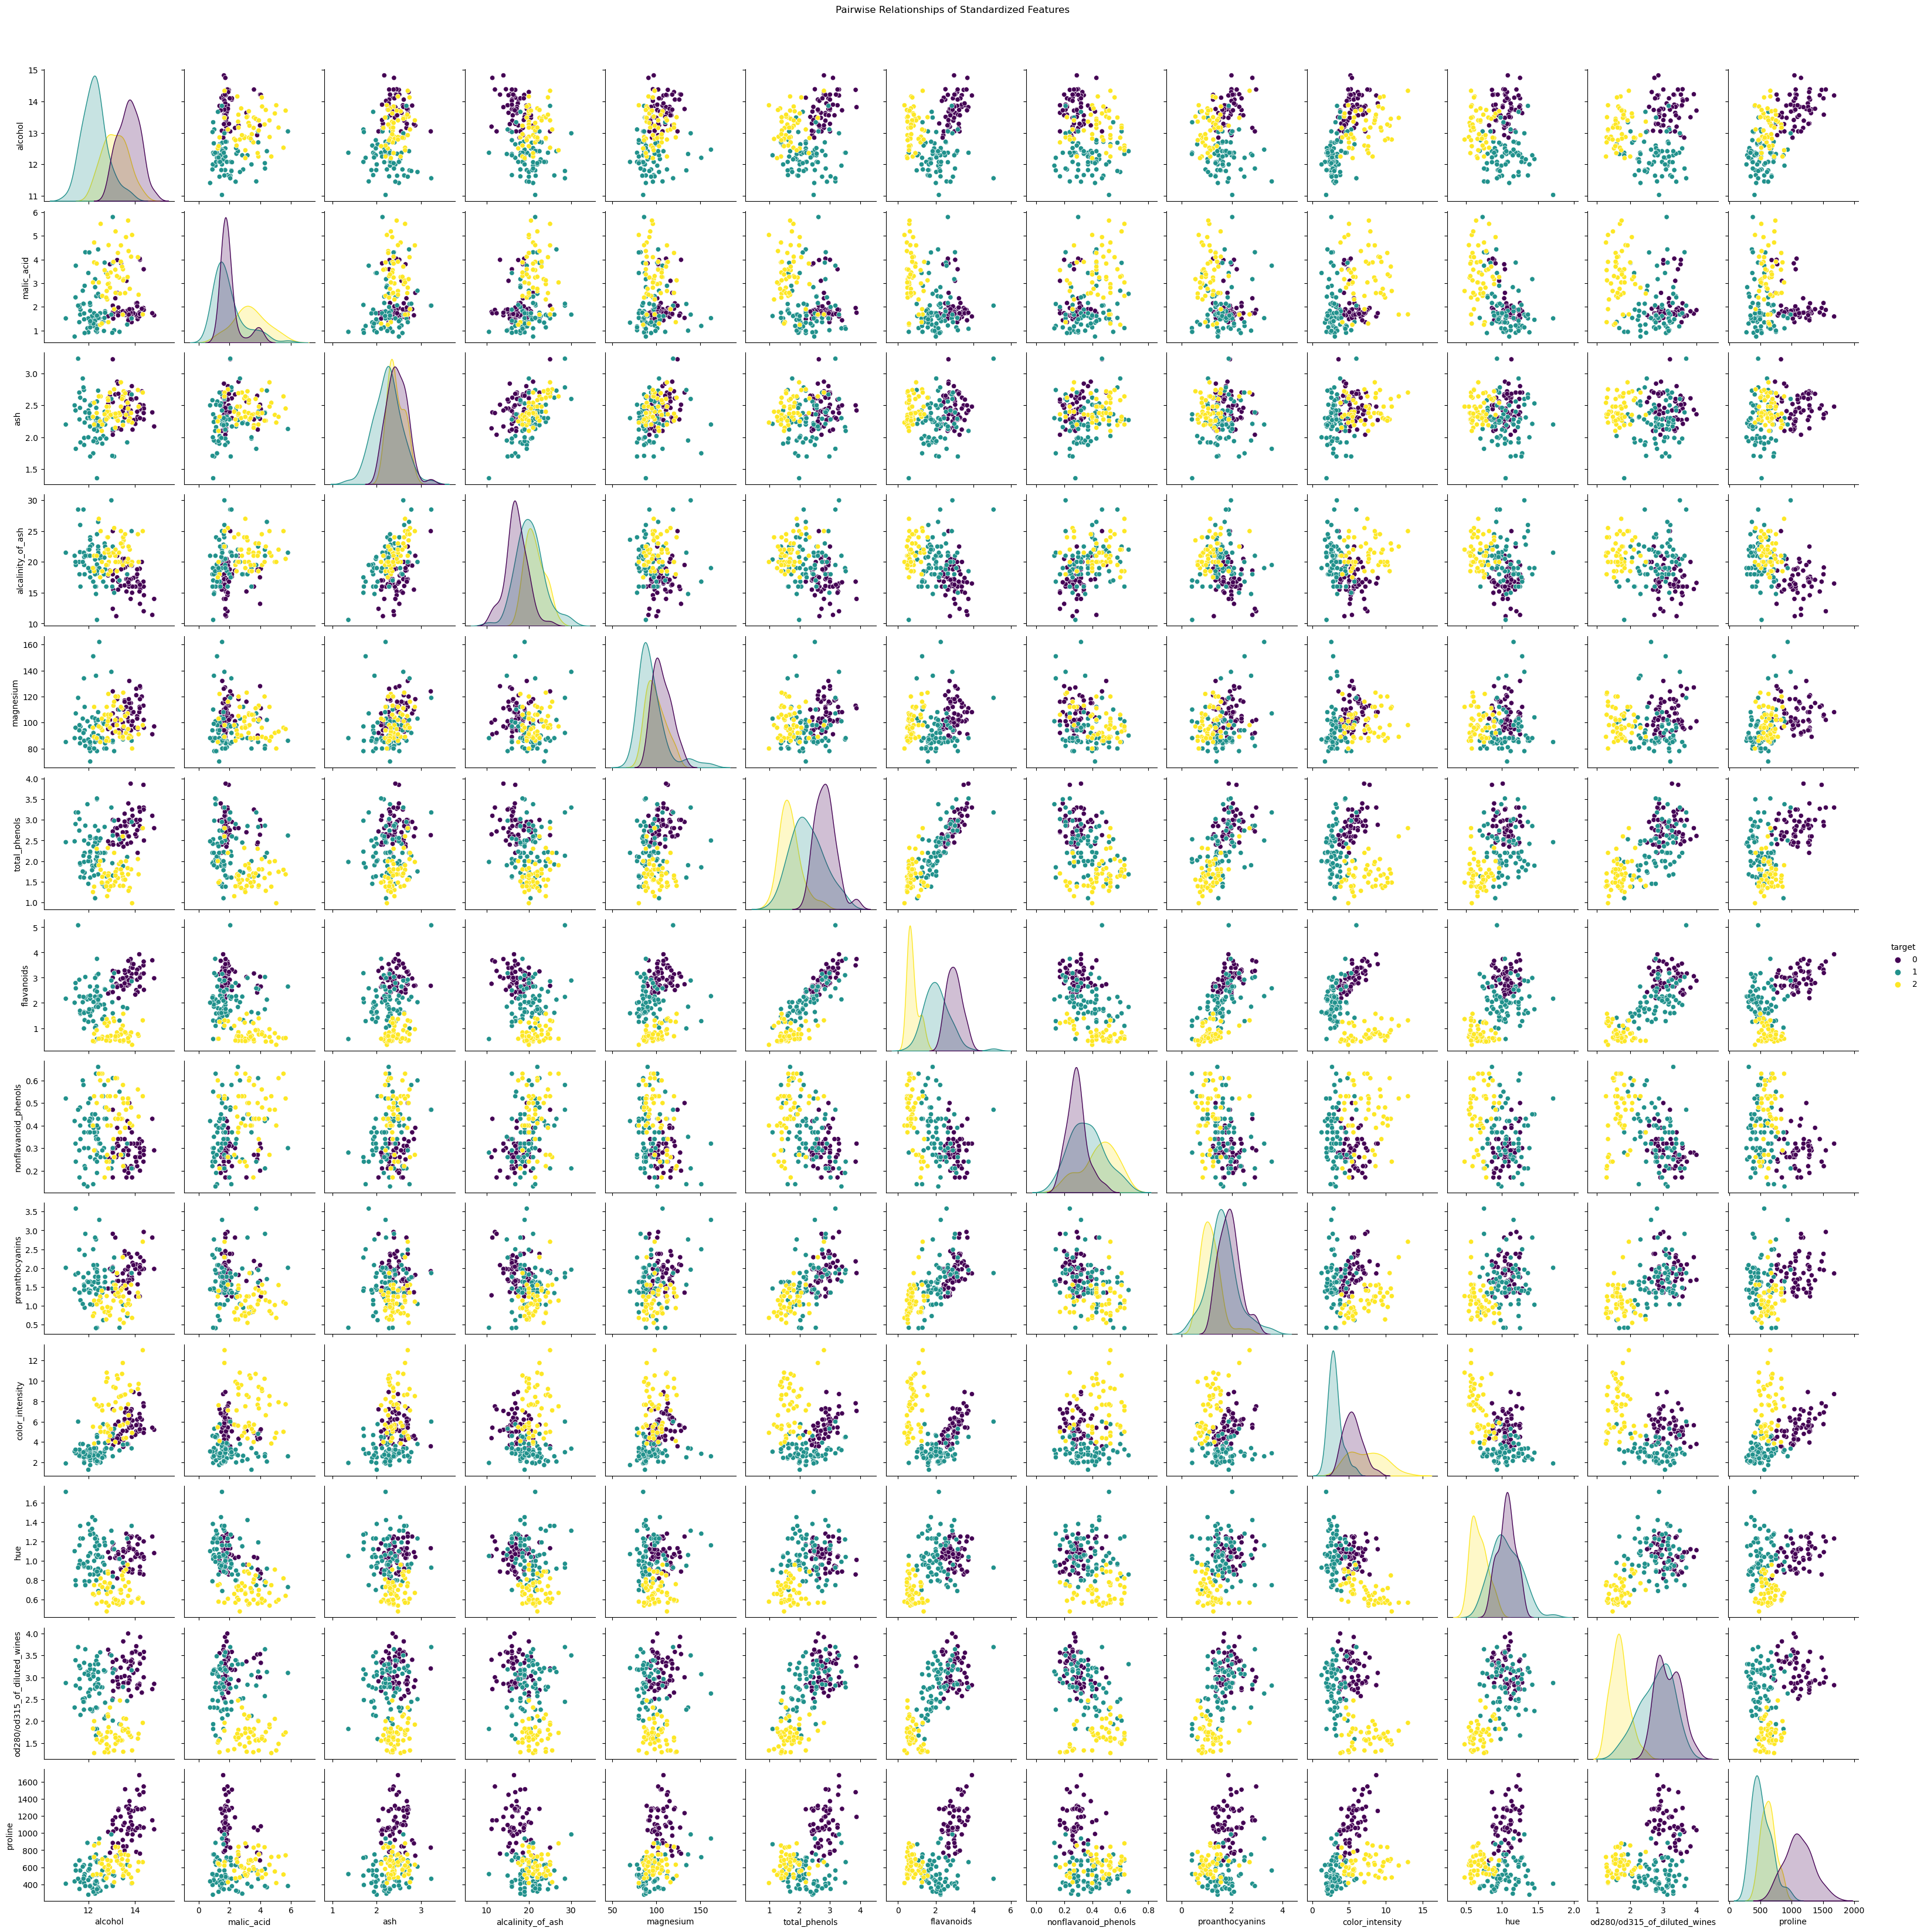

In [9]:
#PairPlot
X_norm_df=pd.DataFrame(X,columns=data.feature_names)
X_norm_df["target"]=y
sns.pairplot(X_norm_df,hue="target",palette="viridis",diag_kind="kde")
plt.suptitle("Pairwise Relationships of Standardized Features",y=1.02)
plt.show()

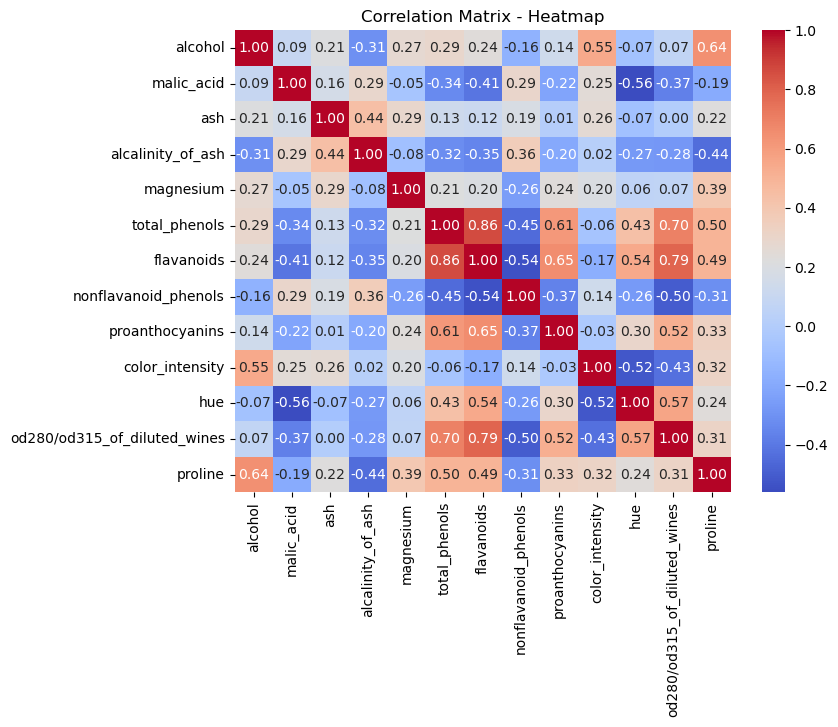

In [10]:
#Correlation Matrix
cm=np.corrcoef(X.T)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt=".2f",cmap="coolwarm",xticklabels=data.feature_names,yticklabels=data.feature_names)
plt.title("Correlation Matrix - Heatmap")
plt.show()

In [11]:
#Normalize the data
scaler=StandardScaler()
X_normalized=scaler.fit_transform(X)

In [12]:
X_normalized

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [13]:
print("Normalized Data. Shape:", X_normalized.shape)

Normalized Data. Shape: (178, 13)


In [14]:
# Apply SVD
U,S,VT=np.linalg.svd(X_normalized,full_matrices=False)
#Display singular values
print("Singular Values:\n", S)

Singular Values:
 [28.94203422 21.08225141 16.04371561 12.78973645 12.32374195 10.68713954
  9.90368818  7.8760733   7.17081793  6.6828618   6.33958815  5.48097635
  4.28967045]


In [15]:
U.shape,S.shape,VT.shape

((178, 13), (13,), (13, 13))

In [16]:
#Compute explained variance
explained_variance=(S**2)/(X_normalized.shape[0]-1)
explained_variance_ratio=explained_variance/np.sum(explained_variance)
print("Explained Variance Ratio:",explained_variance_ratio)

Explained Variance Ratio: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


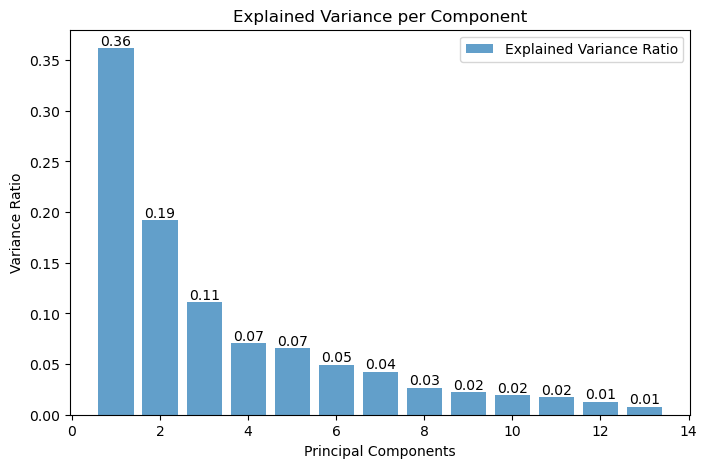

In [17]:
#Visualize explained variance ratio
plt.figure(figsize=(8,5))
vrbar=plt.bar(range(1,len(S) + 1),explained_variance_ratio,alpha=0.7,label="Explained Variance Ratio")
for i,vrbar in enumerate(vrbar):
    plt.text(vrbar.get_x()+vrbar.get_width()/2,vrbar.get_height(),f'{explained_variance_ratio[i]:.2f}', ha='center', va='bottom')
plt.xlabel("Principal Components")
plt.ylabel("Variance Ratio")
plt.title("Explained Variance per Component")
plt.legend()
plt.show()

Cumulative Explained Variance: [0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]

Number of components chosen (95% variance): 10


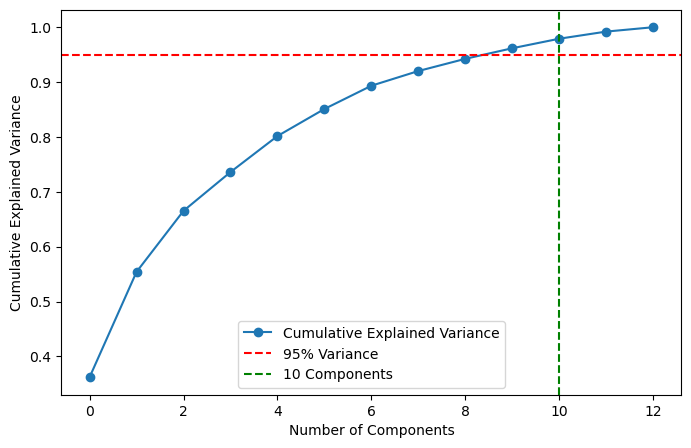

In [18]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("Cumulative Explained Variance:",cumulative_explained_variance)

#Choose the number of components - to obtain 95% Variance
k=np.argmax(cumulative_explained_variance>=0.95)+1
print(f"\nNumber of components chosen (95% variance): {k}")

#Plot explained variance
plt.figure(figsize=(8,5))
plt.plot(cumulative_explained_variance,marker='o',label='Cumulative Explained Variance')
plt.axhline(y=0.95,color='r',linestyle='--',label='95% Variance')
plt.axvline(x=k, color='g',linestyle='--',label=f'{k} Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.show()


In [19]:
# Loadings: Contribution of each feature to principal components
loadings=VT[:k].T[:,:k]
print(f"Top {k} Principal Components Loadings:\n", loadings)

Top 10 Principal Components Loadings:
 [[-0.1443294   0.48365155 -0.20738262  0.0178563  -0.26566365  0.21353865
  -0.05639636  0.39613926 -0.50861912  0.21160473]
 [ 0.24518758  0.22493093  0.08901289 -0.53689028  0.03521363  0.53681385
   0.42052391  0.06582674  0.07528304 -0.30907994]
 [ 0.00205106  0.31606881  0.6262239   0.21417556 -0.14302547  0.15447466
  -0.14917061 -0.17026002  0.30769445 -0.02712539]
 [ 0.23932041 -0.0105905   0.61208035 -0.06085941  0.06610294 -0.10082451
  -0.28696914  0.42797018 -0.20044931  0.05279942]
 [-0.14199204  0.299634    0.13075693  0.35179658  0.72704851  0.03814394
   0.3228833  -0.15636143 -0.27140257  0.06787022]
 [-0.39466085  0.06503951  0.14617896 -0.19806835 -0.14931841 -0.0841223
  -0.02792498 -0.40593409 -0.28603452 -0.32013135]
 [-0.4229343  -0.00335981  0.1506819  -0.15229479 -0.10902584 -0.01892002
  -0.06068521 -0.18724536 -0.04957849 -0.16315051]
 [ 0.2985331   0.02877949  0.17036816  0.20330102 -0.50070298 -0.25859401
   0.59544729

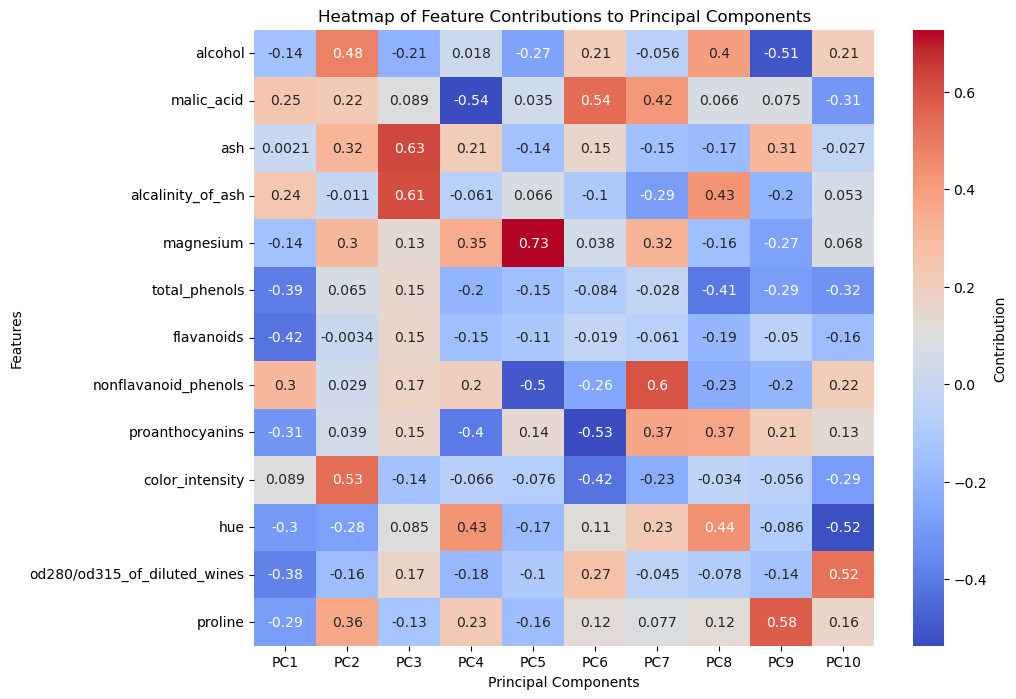

In [20]:
# Create a heatmap with Loadings
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap="coolwarm", xticklabels=[f"PC{i+1}" for i in range(loadings.shape[1])],
            yticklabels=data.feature_names, cbar_kws={"label": "Contribution"})
plt.title("Heatmap of Feature Contributions to Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Features")
plt.show()

In [21]:
def pcs_impl(X_normalized,U,S,VT,k):
    #Select top k components - truncating Smaller Singular Values
    U_k=U[:,:k]
    S_k=np.diag(S[:k])
    VT_k=VT[:k,:]
    # Reduce dimensions using the top k components - Project the data onto the subspace defined by top k principal components
    X_reduced=X_normalized @ VT_k.T # We can also Use U_k@S_k
    return X_reduced

In [22]:
X_reduced=pcs_impl(X_normalized,U,S,VT,k)
print(f"Shape of reduced data: {X_reduced.shape}")

Shape of reduced data: (178, 10)


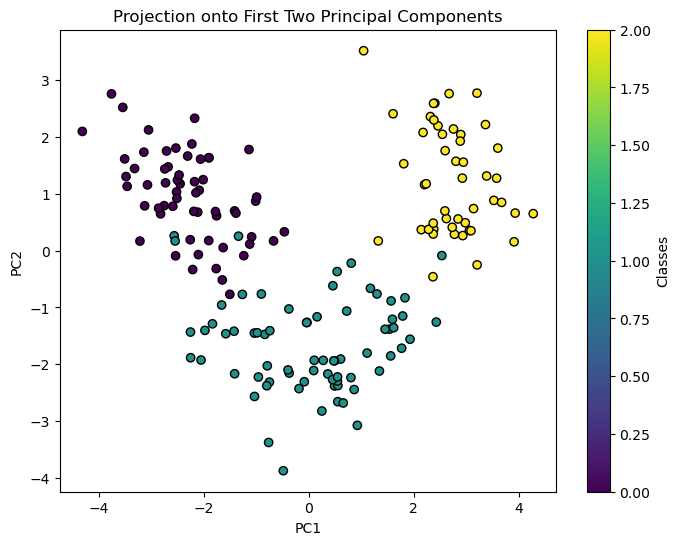

In [23]:
#Visualization of the first two principal components - PC's
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Projection onto First Two Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Classes")
plt.show()

In [24]:
#The Choice of k vs Classification accuracy with and without PCA

In [25]:
#Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [26]:
#Function to perform With and Without PCA and evaluate model performance using Logistic Regression
def evaluate_with_and_without_pca_performance(X_train,X_test,y_train,y_test,k_range):
    performance={"k":[],"Accuracy Without PCA":[],"Accuracy With PCA":[]}
    # Normalize the data
    scaler=StandardScaler()
    X_train_normalized=scaler.fit_transform(X_train)
    X_test_normalized=scaler.transform(X_test)
    # Train and evaluate without PCA
    model=LogisticRegression(max_iter=1000,random_state=42)
    model.fit(X_train_normalized,y_train)
    y_pred=model.predict(X_test_normalized)
    accuracy_no_pca=accuracy_score(y_test,y_pred)
    U,S,VT=np.linalg.svd(X_train_normalized,full_matrices=False)
    # Plot configuration for 3x3 subplot grid
    plt.figure(figsize=(15,15))

    for i,k in enumerate(k_range,1):
        # Apply PCA with SVD by having k components
        X_train_pca=pcs_impl(X_train_normalized,U,S,VT,k)
        X_test_pca=pcs_impl(X_test_normalized,U,S,VT,k)
        #Train and evaluate with PCA
        model_pca=LogisticRegression(max_iter=1000,random_state=42)
        model_pca.fit(X_train_pca,y_train)
        y_pred_pca=model_pca.predict(X_test_pca)
        accuracy_with_pca=accuracy_score(y_test,y_pred_pca)
        #Save results
        performance["k"].append(k)
        performance["Accuracy Without PCA"].append(accuracy_no_pca)
        performance["Accuracy With PCA"].append(accuracy_with_pca)
        
        #Plot the first two principal components for each value of k
        plt.subplot(3,3,i)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train,cmap='viridis',edgecolor='k',s=50)
        plt.title(f"PCA Projection for k={k}\nX_train_pca shape: {X_train_pca.shape}\nX_test_pca shape: {X_test_pca.shape}")
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.colorbar(label="Classes")
        plt.grid(True)
    plt.tight_layout()
    plt.show()
    return pd.DataFrame(performance)

In [27]:
# Range of k (number of components)
k_range=range(2,11)

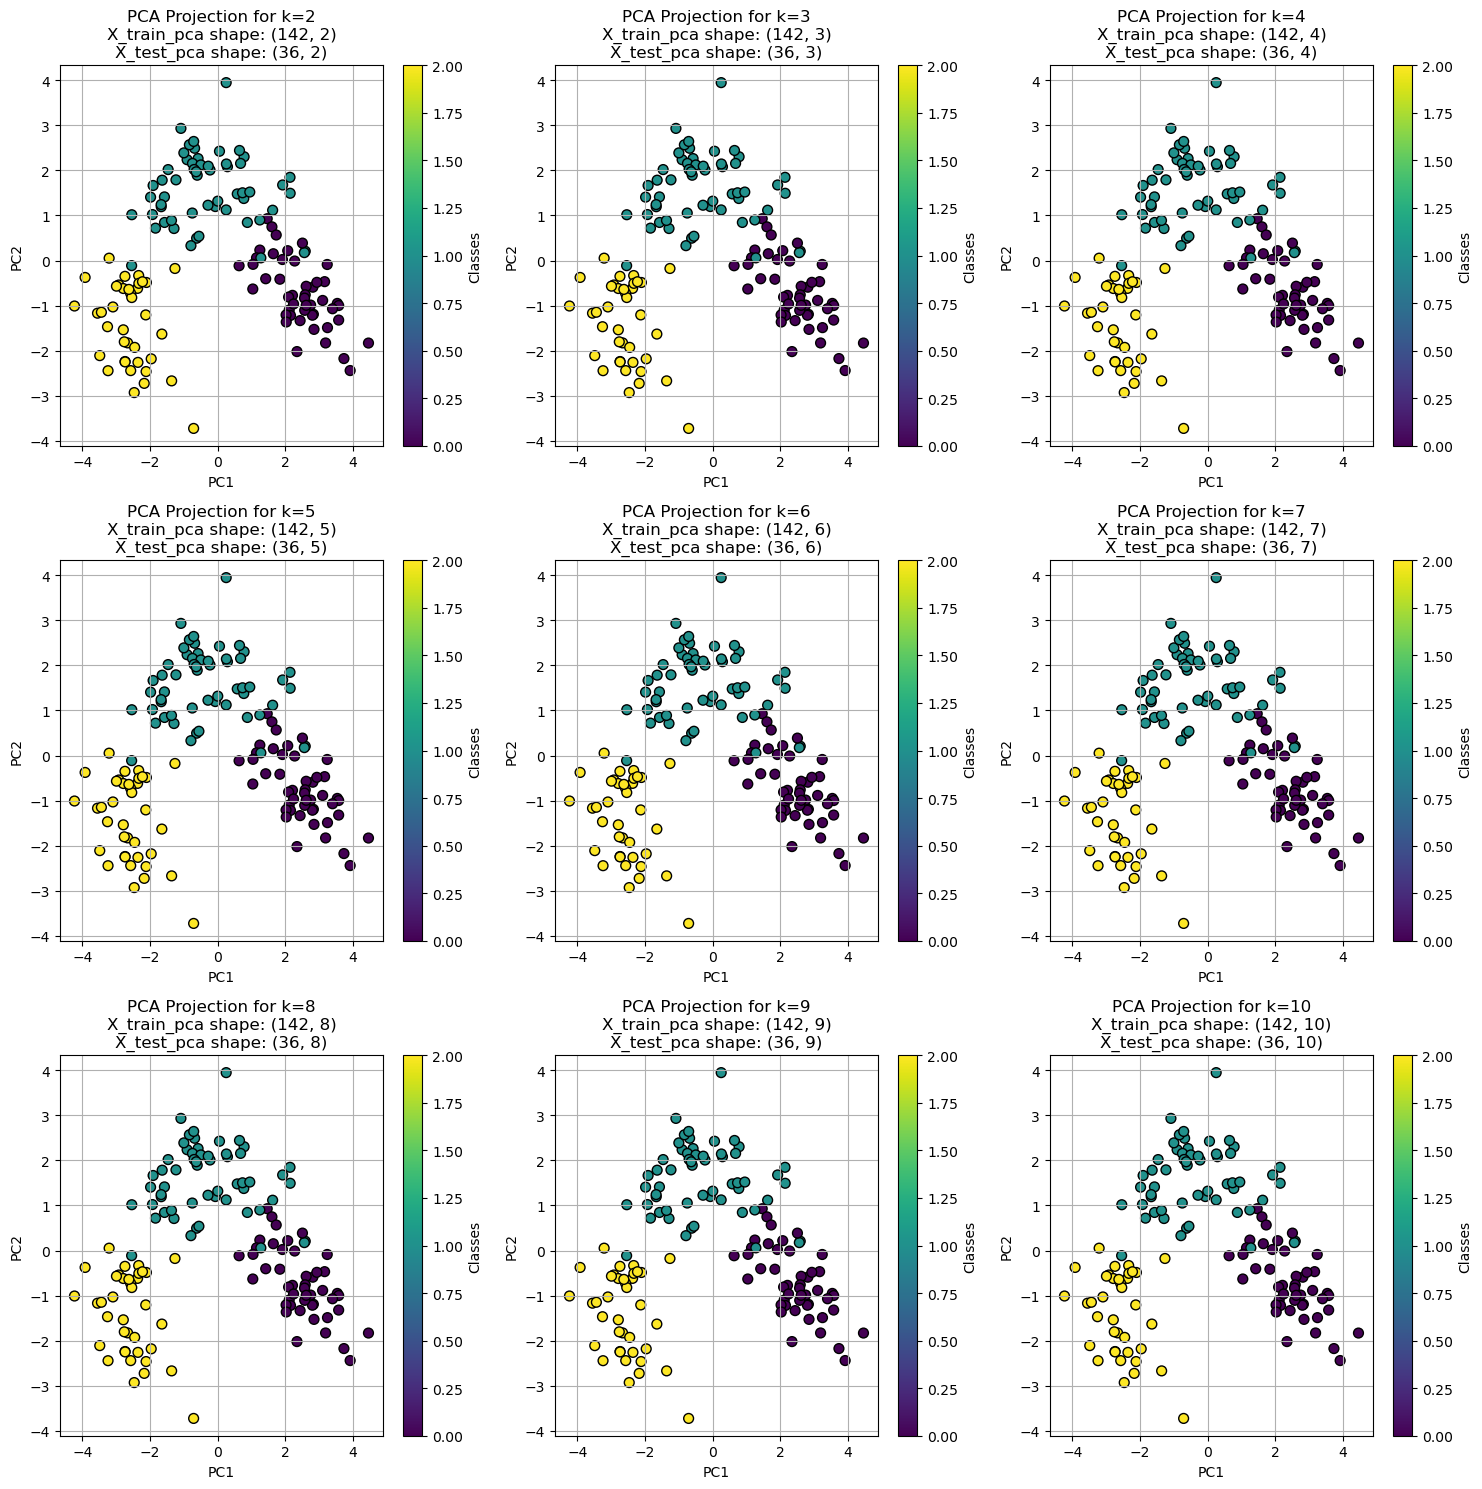

    k  Accuracy Without PCA  Accuracy With PCA
0   2              0.972222           1.000000
1   3              0.972222           0.972222
2   4              0.972222           0.972222
3   5              0.972222           0.972222
4   6              0.972222           0.944444
5   7              0.972222           0.944444
6   8              0.972222           0.944444
7   9              0.972222           0.972222
8  10              0.972222           0.972222


In [28]:
# Evaluate model performance
performance_df=evaluate_with_and_without_pca_performance(X_train,X_test,y_train,y_test,k_range)
# Display the results
print(performance_df)

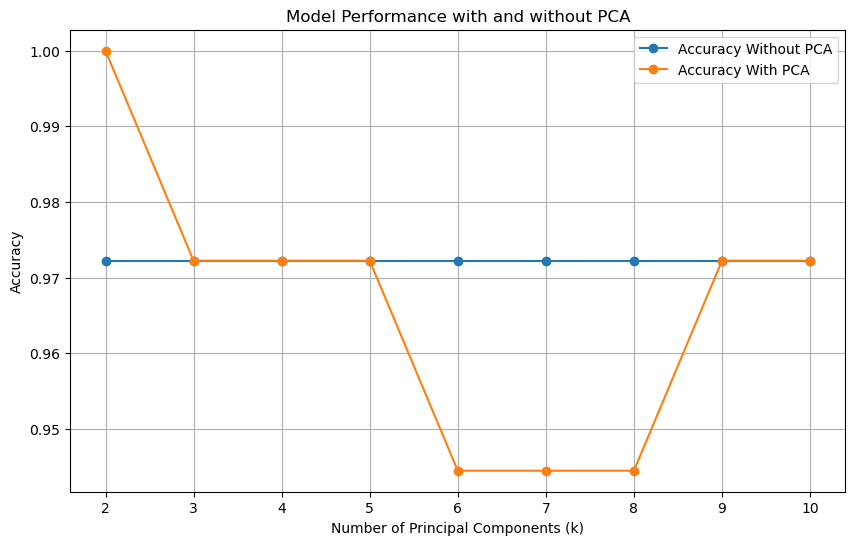

In [29]:
# Plot the results
plt.figure(figsize=(10,6))
plt.plot(performance_df["k"],performance_df["Accuracy Without PCA"],label="Accuracy Without PCA",marker='o')
plt.plot(performance_df["k"],performance_df["Accuracy With PCA"],label="Accuracy With PCA",marker='o')
plt.xlabel("Number of Principal Components (k)")
plt.ylabel("Accuracy")
plt.title("Model Performance with and without PCA")
plt.legend()
plt.grid(True)
plt.show()

In [30]:
# Function to perform With and Without PCA and evaluate model performance using Random Forest
def evaluate_with_and_without_pca_performance_rf(X_train,X_test,y_train,y_test,k_range):
    performance={"k":[],"Accuracy Without PCA":[],"Accuracy With PCA":[]}
    # Normalize the data
    scaler=StandardScaler()
    X_train_normalized=scaler.fit_transform(X_train)
    X_test_normalized=scaler.transform(X_test)
    # Train and evaluate without PCA using Random Forest
    rf_model=RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_normalized,y_train)
    y_pred=rf_model.predict(X_test_normalized)
    accuracy_no_pca=accuracy_score(y_test,y_pred)
    # Perform SVD on the normalized training data
    U,S,VT=np.linalg.svd(X_train_normalized,full_matrices=False)
    # Plot configuration for 3x3 subplot grid
    plt.figure(figsize=(15,15))
    for i,k in enumerate(k_range,1):
        # Apply PCA with SVD by having k components
        X_train_pca=pcs_impl(X_train_normalized,U,S,VT,k)
        X_test_pca=pcs_impl(X_test_normalized,U,S,VT,k)
        # Train and evaluate with PCA using Random Forest
        rf_model_pca=RandomForestClassifier(random_state=42)
        rf_model_pca.fit(X_train_pca,y_train)
        y_pred_pca=rf_model_pca.predict(X_test_pca)
        accuracy_with_pca=accuracy_score(y_test,y_pred_pca)
        # Save results
        performance["k"].append(k)
        performance["Accuracy Without PCA"].append(accuracy_no_pca)
        performance["Accuracy With PCA"].append(accuracy_with_pca)
        # Plot the first two principal components for each value of k
        plt.subplot(3,3,i)
        plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train,cmap='viridis',edgecolor='k',s=50)
        plt.title(f"PCA Projection for k={k}\nX_train_pca shape: {X_train_pca.shape}\nX_test_pca shape: {X_test_pca.shape}")
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.colorbar(label="Classes")
        plt.grid(True)
    plt.tight_layout()
    plt.show()
    return pd.DataFrame(performance)

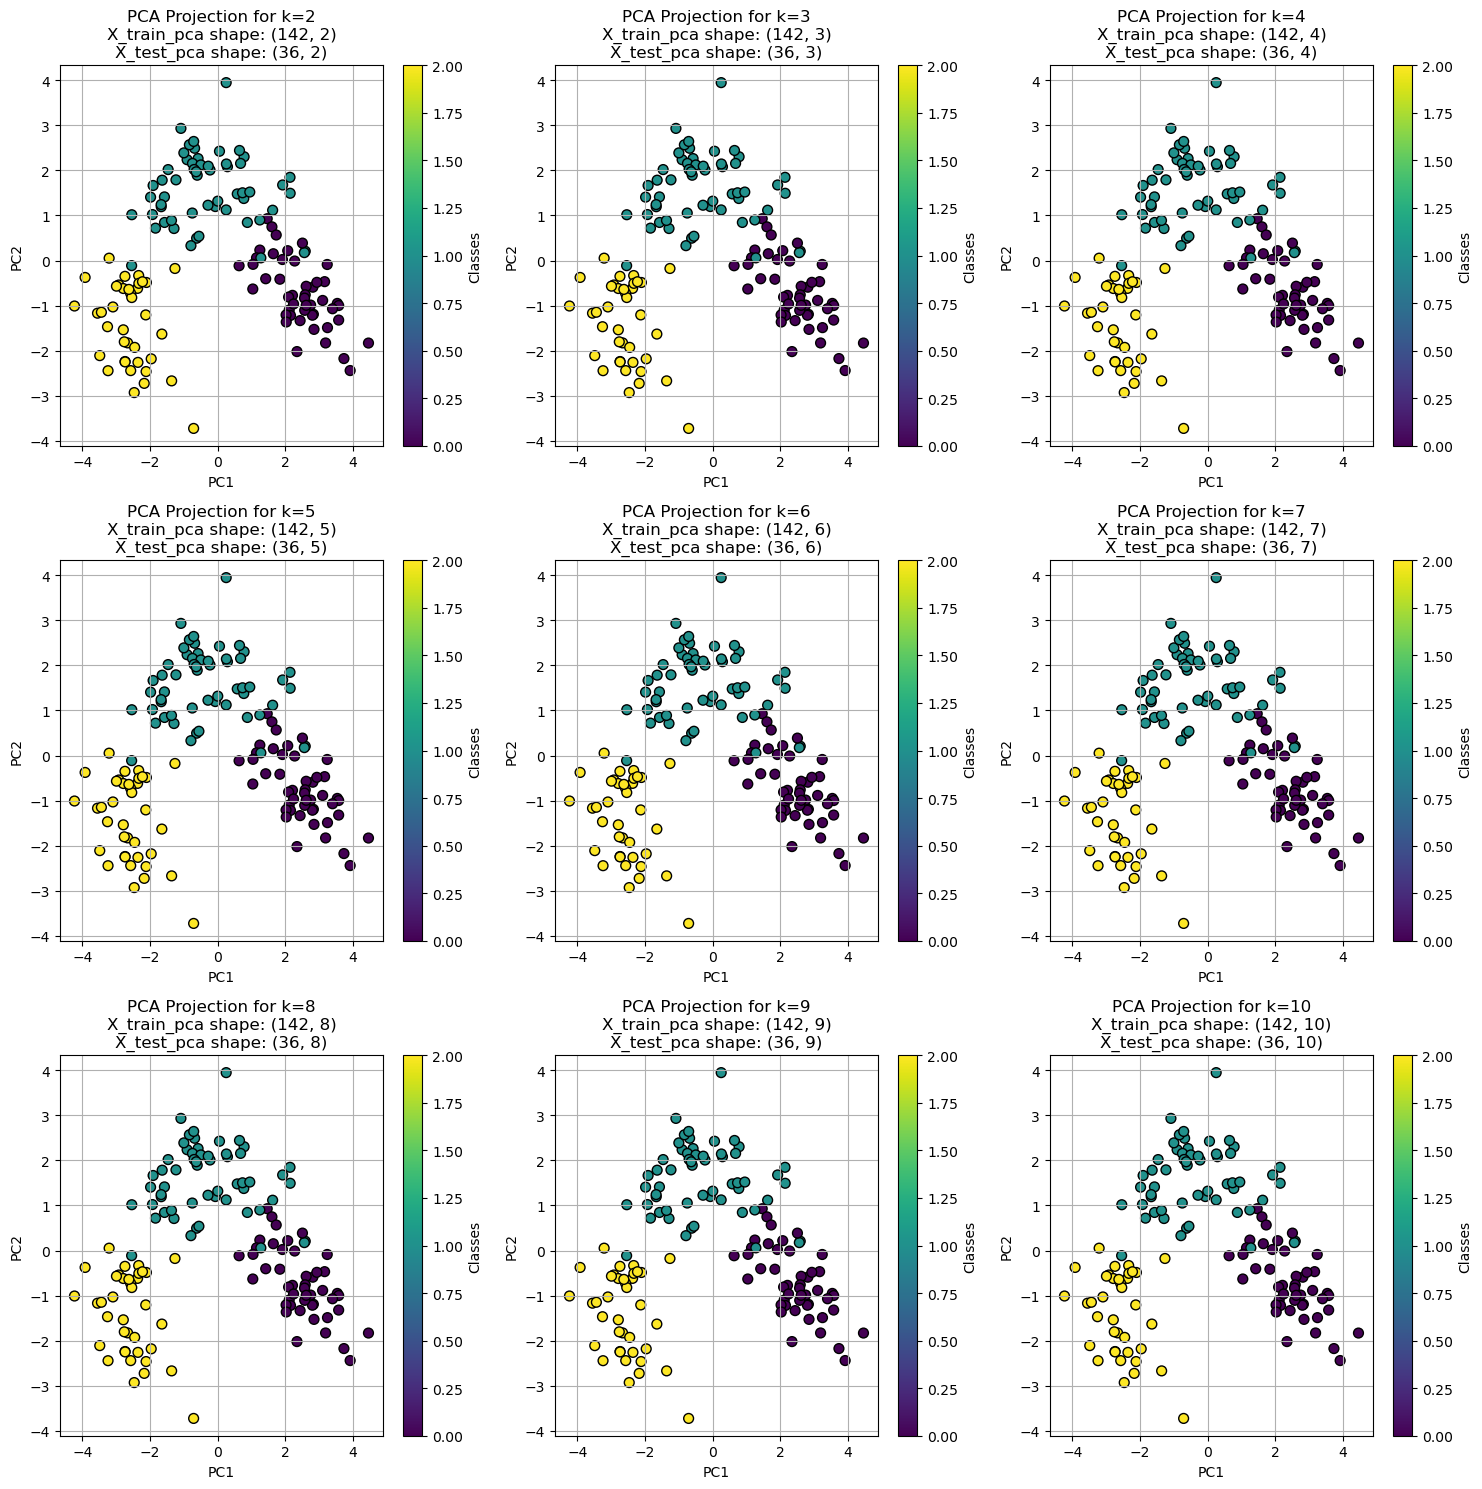

    k  Accuracy Without PCA  Accuracy With PCA
0   2                   1.0           0.972222
1   3                   1.0           0.972222
2   4                   1.0           0.972222
3   5                   1.0           1.000000
4   6                   1.0           0.972222
5   7                   1.0           1.000000
6   8                   1.0           0.972222
7   9                   1.0           1.000000
8  10                   1.0           1.000000


In [31]:
# Evaluate model performance
performance_df_rf=evaluate_with_and_without_pca_performance_rf(X_train,X_test,y_train,y_test,k_range)
# Display the results
print(performance_df_rf)

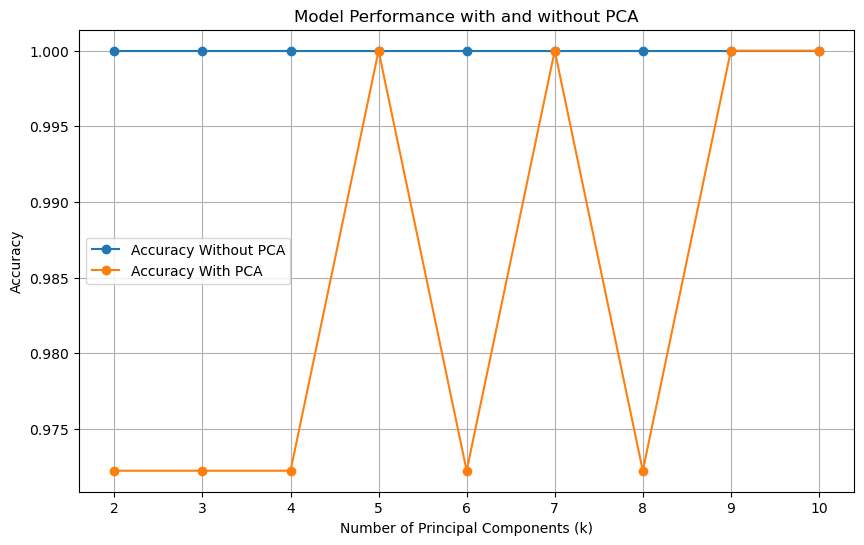

In [32]:
# Plot the results
plt.figure(figsize=(10,6))
plt.plot(performance_df_rf["k"],performance_df_rf["Accuracy Without PCA"],label="Accuracy Without PCA",marker='o')
plt.plot(performance_df_rf["k"],performance_df_rf["Accuracy With PCA"],label="Accuracy With PCA",marker='o')
plt.xlabel("Number of Principal Components (k)")
plt.ylabel("Accuracy")
plt.title("Model Performance with and without PCA")
plt.legend()
plt.grid(True)
plt.show()